<a href="https://colab.research.google.com/github/spmpijush/python/blob/main/Knn_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**


In [38]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns


## **Data Loading And Plotting**

In [56]:
iris_data = pd.read_csv('Iris.csv')
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## **Unique Classes**

In [7]:
iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Total Value Count of Every Classes

In [9]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


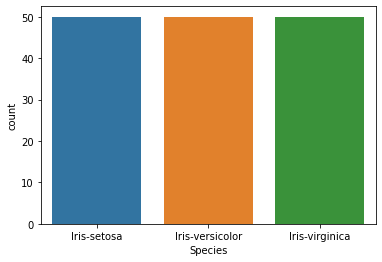

In [8]:
sns.countplot(iris_data['Species'])

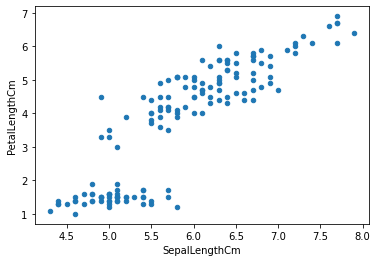

In [10]:
iris_data.plot(kind='scatter',
               x ='SepalLengthCm',
               y ='PetalLengthCm'
               )

## **Create feature and target arrays**

In [12]:
x = iris_data.drop(['Species'],axis=1)
y = iris_data['Species']

In [13]:
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [14]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

# Split into training and test set

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)


## **K-NN Classifier**

In [50]:
k_range = list(range(1,12))
train_acc=np.empty(len(k_range))
test_acc=np.empty(len(k_range))
acc = []
for i in k_range:
  knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  acc.append(metrics.accuracy_score(y_test, y_pred))
  

In [51]:
acc

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [52]:
knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

1.0

In [54]:
print(classification_report(y_test, y_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

acc_score = accuracy_score(y_test, y_pred)
print('Accuracy Score: ', acc_score)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy Score:  1.0


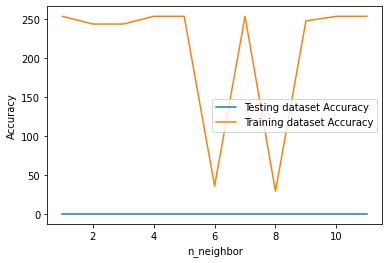

In [55]:
plt.plot(k_range, test_acc, label = 'Testing dataset Accuracy')
plt.plot(k_range, train_acc, label = 'Training dataset Accuracy')
plt.legend()
plt.xlabel('n_neighbor')
plt.ylabel('Accuracy')
plt.show()
